## Algorithms for Genomic Data Science

In [1]:
def longestCommonPrefix(s1, s2):
    i = 0
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i += 1
    return s1[:i]

In [2]:
longestCommonPrefix('ACCATGT', 'ACCAGAC')

'ACCA'

In [3]:
def reverseComplement(s):
    complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A', 'N':'N', 'a':'t', 'c':'g', 't':'a', 'n':'n'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [4]:
reverseComplement('ACCATGGT')

'ACCATGGT'

In [5]:
!curl -0 https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

>gi|9626243|ref|NC_001416.1| Enterobacteria phage lambda, complete genome
GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCG
TCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGC
TTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCA
GCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTG
CGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGG
ATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCT
CCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAG
AATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTG
AAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACA
TGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCG
GGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGC
TCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAAT
CCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGA
CTA

In [6]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [7]:
genome = readGenome('lambda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [8]:
len(genome)

48502

In [9]:
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
for base in genome:
    counts[base] += 1
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [10]:
import collections
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

## Phred Encoding

In [11]:
def QtoPhred33(Q):
    '''Turn Q into Phred+33 ASCII-encoded quality'''
    return chr(Q + 33)

In [12]:
def phred33ToQ(qual):
    '''Turn Phred+33 ASCII-encoded quality into Q'''
    return ord(qual)-33

In [13]:
QtoPhred33(73)

'j'

In [14]:
!curl -0 http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

@SRR835775.1 1/1
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC
+
???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################
@SRR835775.2 2/1
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC
+
CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########
@SRR835775.3 3/1
TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG
+
@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A
@SRR835775.4 4/1
TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA
+
@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################
@SRR835775.5 5/1
CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCAC

In [15]:
def readFastq(filename):
    sequences =[]
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [16]:
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [17]:
print(seqs[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']


In [18]:
print(quals[:5])

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


In [19]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [20]:
phred33ToQ('#')

2

In [21]:
phred33ToQ('J')

41

In [22]:
def createHist(qualities):
    hist = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

In [23]:
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


(array([34.,  3.,  2.,  2.,  1.,  2.,  3.,  2.,  0.,  1.]),
 array([    0. ,  1181.4,  2362.8,  3544.2,  4725.6,  5907. ,  7088.4,
         8269.8,  9451.2, 10632.6, 11814. ]),
 <a list of 10 Patch objects>)

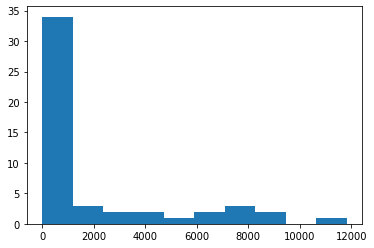

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(h)

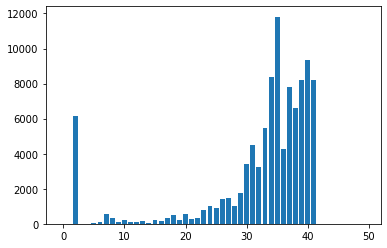

In [25]:
plt.bar(range(len(h)), h)
plt.show()

In [26]:
def findGCByPos(reads):
    gc = [0] * 100
    totals = [0] * 100
    
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
                
    for i in range(len(gc)):
        if totals[i] >0:
            gc[i] /= float(totals[1])
            
    return gc

[0.486, 0.535, 0.574, 0.569, 0.58, 0.562, 0.557, 0.563, 0.562, 0.577, 0.582, 0.547, 0.531, 0.572, 0.548, 0.546, 0.566, 0.587, 0.546, 0.548, 0.578, 0.588, 0.601, 0.594, 0.534, 0.553, 0.553, 0.577, 0.626, 0.565, 0.539, 0.579, 0.558, 0.593, 0.59, 0.578, 0.579, 0.567, 0.561, 0.599, 0.591, 0.575, 0.546, 0.549, 0.574, 0.547, 0.566, 0.593, 0.553, 0.578, 0.566, 0.579, 0.596, 0.578, 0.606, 0.576, 0.551, 0.59, 0.554, 0.568, 0.575, 0.565, 0.597, 0.539, 0.584, 0.577, 0.549, 0.581, 0.598, 0.578, 0.564, 0.553, 0.571, 0.551, 0.575, 0.548, 0.591, 0.579, 0.571, 0.572, 0.558, 0.602, 0.578, 0.582, 0.548, 0.583, 0.542, 0.57, 0.601, 0.593, 0.551, 0.594, 0.543, 0.607, 0.572, 0.598, 0.598, 0.536, 0.593, 0.561]


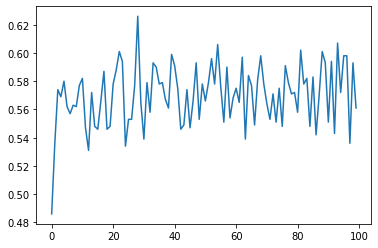

In [27]:
gc = findGCByPos(seqs)
print(gc)
plt.plot(range(len(gc)), gc)
plt.show()

In [28]:
count = collections.Counter()
for seq in seqs:
    count.update(seq)
print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


## Naive Exact Matching

In [29]:
def naive(p,t):    #where p = pattern and t = text
    occurrences = []
    for i in range(len(t) - len(p) + 1): # loop over alignments
        match = True
        for j in range(len(p)): # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False   # mismatch; reject alignment
                break           
        if match:
            occurrences.append(i) # all characters matched; record
    return occurrences

In [30]:
naive('TAC', 'GATTACA')

[3]

## Matching Artificial Reads

In [31]:
import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome.'''
    
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome) - readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [32]:
reads = generateReads(genome, 100, 100)

numMatched = 0
for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched exactly' % (numMatched, len(reads)))

100 / 100 reads matched exactly


## Matching Real Reads

In [33]:
!curl -0 http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

@ERR266411.1 HS18_09233:8:1307:10911:3848#168/1
TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC
+
B@DFEFFFGEGGGHEHGHGHGGGGHIFGFIFHICFGHGHGJGHFGHGIHEHGGHJGFEFHGHEGGHHGHIFGFGDIFGGFGGGFHGGGHGGGAGIFGGCG
@ERR266411.2 HS18_09233:8:2114:9377:50721#168/1
AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATACGAAAGTGTTAACTTCTGCGTCATGGACACGAAAAAACTCCC
+
=@@CEBF@BGBG6GF1E<04C3E7E.9G=H<H:HH;HBH;G69F7,7DG((EG8A8,-5-8,?,,,AE>C,B?,,,64$AC'+'='+4'3*4+E322*'(
@ERR266411.3 HS18_09233:8:2116:11778:26937#168/1
TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC
+
@@DFEEFFGFGGGFFHGHGGIGGGHIHGFIEHGHHHHFIGGEHFGHGFHGHEGHGGFGFDGHHGIHCGDFFDFDGEIGGFGHGGHGCFFGGGDGEFCFCD
@ERR266411.4 HS18_09233:8:2204:14371:92031#168/1
AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG
+
A@DFEFFFGDGGGHFHHHGHGGFGHILGFGEHHHFHHFIGHGHFGHGGGEHGGHJGGHFGFGHHEHFGHICKFGJEIGGIFGGGHGGFHIE

In [41]:
phix_reads, _ = readFastq('ERR266411_1.first1000.fastq')

In [42]:
numMatched = 0
n = 0
for r in phix_reads:
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome' % (numMatched, n))

0 / 1000 reads matched the genome


In [43]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome' % (numMatched, n))

0 / 1000 reads matched the genome


In [44]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]
    matches = naive(r, genome)
    matches.extend(naive(reverseComplement(r), genome))
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome' % (numMatched, n))

0 / 1000 reads matched the genome
